In [23]:
def showImage(img):
    plt.imshow(img, cmap="gray")

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('../img/lenna.png', 0)

#   Fourier transform
f = np.fft.fft2(img)

#  Move the DC component of the FFT output to the center of the spectrum
fshift = np.fft.fftshift(f)

# logarithmic transformation
magnitude_spectrum = 20*np.log(np.abs(fshift))

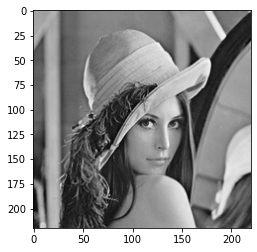

In [25]:
showImage(img)

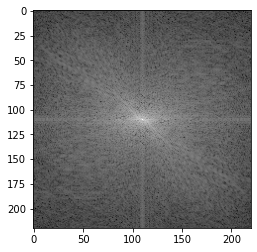

In [31]:
showImage(magnitude_spectrum)

In [ ]:
f_ishift = np.fft.ifftshift(fshift)

# inverse Fourier transform
img_back = np.fft.ifft2(f_ishift)
# 
img_back = np.abs(img_back)

In [27]:
#Create mask
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# Use mask to remove low frequency components
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# logarithmic transformation
magnitude_spectrum1 = 20*np.log(np.abs(fshift))

# 
f_ishift = np.fft.ifftshift(fshift)

# inverse Fourier transform
img_back = np.fft.ifft2(f_ishift)
# 
img_back = np.abs(img_back)

<ipython-input-27-11543ab15cef>:9: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(np.abs(fshift))


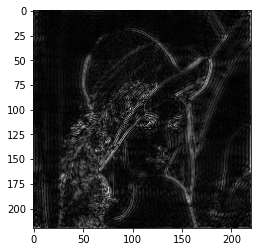

In [28]:
showImage(img_back)

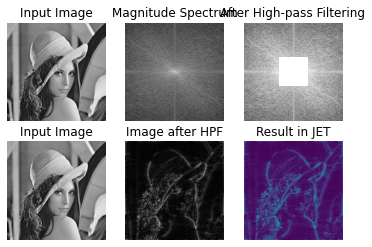

In [29]:
#Input Image
plt.subplot(231), plt.imshow(img, cmap='gray'),
plt.title('Input Image'), plt.axis('off')

#Magnitude Spectrum'
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'),
plt.title('Magnitude Spectrum'), plt.axis('off')

#After High-pass Filtering
plt.subplot(233), plt.imshow(magnitude_spectrum1, cmap='gray'),
plt.title('After High-pass Filtering'), plt.axis('off')

#Input Image
plt.subplot(234), plt.imshow(img, cmap='gray'),
plt.title('Input Image'), plt.axis('off')


#Image after HPF
plt.subplot(235), plt.imshow(img_back, cmap='gray'),
plt.title('Image after HPF'), plt.axis('off')

#Result in JET
plt.subplot(236), plt.imshow(img_back),
plt.title('Result in JET'), plt.axis('off')
plt.show()